In [1]:
import seaborn as sns

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
import pandas as pd

df2 = pd.get_dummies(df['pclass'], prefix='pclass')
df = pd.concat([df, df2], axis=1)
del(df["pclass"])
del(df["class"]) # 같은 내용이므로 제거
df.tail()

,survived,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone,pclass_1,pclass_2,pclass_3
886,0,male,27.0,0,0,13.00,S,man,True,NaN,Southampton,no,True,0,1,0
887,1,female,19.0,0,0,30.00,S,woman,False,B,Southampton,yes,True,1,0,0
888,0,female,NaN,1,2,23.45,S,woman,False,NaN,Southampton,no,False,0,0,1
889,1,male,26.0,0,0,30.00,C,man,True,C,Cherbourg,yes,True,1,0,0
890,0,male,32.0,0,0,7.75,Q,man,True,NaN,Queenstown,no,True,0,0,1


In [3]:
# male,female=> 1,0
from sklearn.preprocessing import LabelEncoder

df["sex"] = LabelEncoder().fit_transform(df["sex"])
del(df["who"]) #같은 내용이므로 제거
df.tail()

,survived,sex,age,sibsp,parch,fare,embarked,adult_male,deck,embark_town,alive,alone,pclass_1,pclass_2,pclass_3
886,0,1,27.0,0,0,13.00,S,True,NaN,Southampton,no,True,0,1,0
887,1,0,19.0,0,0,30.00,S,False,B,Southampton,yes,True,1,0,0
888,0,0,NaN,1,2,23.45,S,False,NaN,Southampton,no,False,0,0,1
889,1,1,26.0,0,0,30.00,C,True,C,Cherbourg,yes,True,1,0,0
890,0,1,32.0,0,0,7.75,Q,True,NaN,Queenstown,no,True,0,0,1


In [4]:
df["adult_male"] = LabelEncoder().fit_transform(df["adult_male"])
df.tail()

,survived,sex,age,sibsp,parch,fare,embarked,adult_male,deck,embark_town,alive,alone,pclass_1,pclass_2,pclass_3
886,0,1,27.0,0,0,13.00,S,1,NaN,Southampton,no,True,0,1,0
887,1,0,19.0,0,0,30.00,S,0,B,Southampton,yes,True,1,0,0
888,0,0,NaN,1,2,23.45,S,0,NaN,Southampton,no,False,0,0,1
889,1,1,26.0,0,0,30.00,C,1,C,Cherbourg,yes,True,1,0,0
890,0,1,32.0,0,0,7.75,Q,1,NaN,Queenstown,no,True,0,0,1


In [5]:
# deck : 선실 고유 번호의 가장 앞자리 알파벳(A ~ G)
from sklearn.impute import SimpleImputer

imputer_deck = SimpleImputer(strategy="most_frequent")
df["deck"] = imputer_deck.fit_transform(df[["deck"]])
df2=pd.get_dummies(df['deck'], prefix='deck')
df = pd.concat([df, df2], axis=1)
del(df["deck"])
pd.set_option('display.max_columns', None)
df.tail()

,survived,sex,age,sibsp,parch,fare,embarked,adult_male,embark_town,alive,alone,pclass_1,pclass_2,pclass_3,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
886,0,1,27.0,0,0,13.00,S,1,Southampton,no,True,0,1,0,0,0,1,0,0,0,0
887,1,0,19.0,0,0,30.00,S,0,Southampton,yes,True,1,0,0,0,1,0,0,0,0,0
888,0,0,NaN,1,2,23.45,S,0,Southampton,no,False,0,0,1,0,0,1,0,0,0,0
889,1,1,26.0,0,0,30.00,C,1,Cherbourg,yes,True,1,0,0,0,0,1,0,0,0,0
890,0,1,32.0,0,0,7.75,Q,1,Queenstown,no,True,0,0,1,0,0,1,0,0,0,0


In [6]:
# age 결측값을 평균으로 채움
df["age"].fillna(df["age"].mean(), inplace=True)
df.tail()

,survived,sex,age,sibsp,parch,fare,embarked,adult_male,embark_town,alive,alone,pclass_1,pclass_2,pclass_3,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
886,0,1,27.000000,0,0,13.00,S,1,Southampton,no,True,0,1,0,0,0,1,0,0,0,0
887,1,0,19.000000,0,0,30.00,S,0,Southampton,yes,True,1,0,0,0,1,0,0,0,0,0
888,0,0,29.699118,1,2,23.45,S,0,Southampton,no,False,0,0,1,0,0,1,0,0,0,0
889,1,1,26.000000,0,0,30.00,C,1,Cherbourg,yes,True,1,0,0,0,0,1,0,0,0,0
890,0,1,32.000000,0,0,7.75,Q,1,Queenstown,no,True,0,0,1,0,0,1,0,0,0,0


In [7]:
from sklearn.impute import SimpleImputer

# 출발지는 범주형이므로 최빈수가 적당함
imputer_embark_town = SimpleImputer(strategy="most_frequent")
# 출발지의 고유 이니셜
df["embarked"] = imputer_embark_town.fit_transform(df[["embarked"]])

In [8]:
# embarked : 출발지의 고유 이니셜
df2 = pd.get_dummies(df['embarked'], prefix='embarked')
df = pd.concat([df, df2], axis=1)
del(df["embarked"])
del(df["embark_town"]) #같은 내용이므로 제거
df.tail()

,survived,sex,age,sibsp,parch,fare,adult_male,alive,alone,pclass_1,pclass_2,pclass_3,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embarked_C,embarked_Q,embarked_S
886,0,1,27.000000,0,0,13.00,1,no,True,0,1,0,0,0,1,0,0,0,0,0,0,1
887,1,0,19.000000,0,0,30.00,0,yes,True,1,0,0,0,1,0,0,0,0,0,0,0,1
888,0,0,29.699118,1,2,23.45,0,no,False,0,0,1,0,0,1,0,0,0,0,0,0,1
889,1,1,26.000000,0,0,30.00,1,yes,True,1,0,0,0,0,1,0,0,0,0,1,0,0
890,0,1,32.000000,0,0,7.75,1,no,True,0,0,1,0,0,1,0,0,0,0,0,1,0


In [9]:
# alive 필드 제거(survived와 같은 내용)
del(df["alive"])
df.tail()

,survived,sex,age,sibsp,parch,fare,adult_male,alone,pclass_1,pclass_2,pclass_3,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embarked_C,embarked_Q,embarked_S
886,0,1,27.000000,0,0,13.00,1,True,0,1,0,0,0,1,0,0,0,0,0,0,1
887,1,0,19.000000,0,0,30.00,0,True,1,0,0,0,1,0,0,0,0,0,0,0,1
888,0,0,29.699118,1,2,23.45,0,False,0,0,1,0,0,1,0,0,0,0,0,0,1
889,1,1,26.000000,0,0,30.00,1,True,1,0,0,0,0,1,0,0,0,0,1,0,0
890,0,1,32.000000,0,0,7.75,1,True,0,0,1,0,0,1,0,0,0,0,0,1,0


In [10]:
df["alone"] = LabelEncoder().fit_transform(df["alone"])
df.tail()

,survived,sex,age,sibsp,parch,fare,adult_male,alone,pclass_1,pclass_2,pclass_3,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embarked_C,embarked_Q,embarked_S
886,0,1,27.000000,0,0,13.00,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1
887,1,0,19.000000,0,0,30.00,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1
888,0,0,29.699118,1,2,23.45,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
889,1,1,26.000000,0,0,30.00,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0
890,0,1,32.000000,0,0,7.75,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0


In [11]:
# 생존여부를 기준으로 한 평균값들
df.groupby("survived").mean()

,sex,age,sibsp,parch,fare,adult_male,alone,pclass_1,pclass_2,pclass_3,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embarked_C,embarked_Q,embarked_S
survived,,,,,,,,,,,,,,,,,,,,
0,0.852459,30.415100,0.553734,0.329690,22.117887,0.817851,0.681239,0.145719,0.176685,0.677596,0.014572,0.021858,0.921676,0.014572,0.014572,0.009107,0.003643,0.136612,0.085610,0.777778
1,0.318713,28.549778,0.473684,0.464912,48.395408,0.257310,0.476608,0.397661,0.254386,0.347953,0.020468,0.102339,0.704678,0.073099,0.070175,0.023392,0.005848,0.271930,0.087719,0.640351


Text(0, 0.5, '빈도')

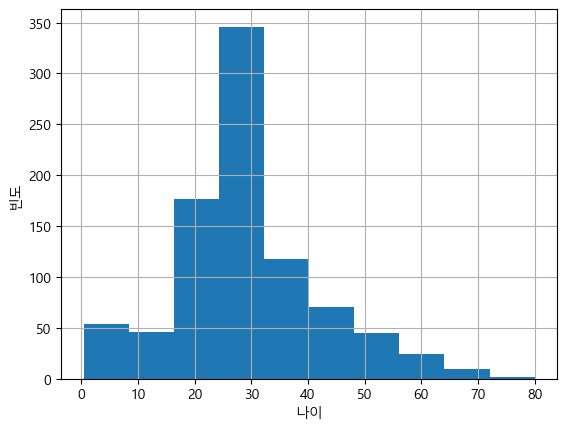

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

df["age"].hist()
plt.xlabel('나이')
plt.ylabel('빈도')


Text(0, 0.5, '빈도')

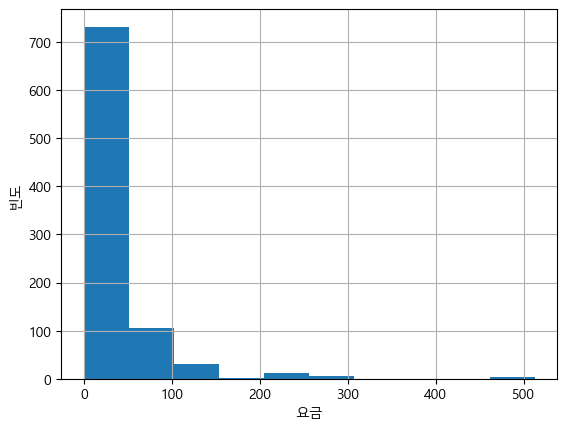

In [13]:
df["fare"].hist()
plt.xlabel('요금')
plt.ylabel('빈도')

In [14]:
df["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 사망, 1: 생존)')

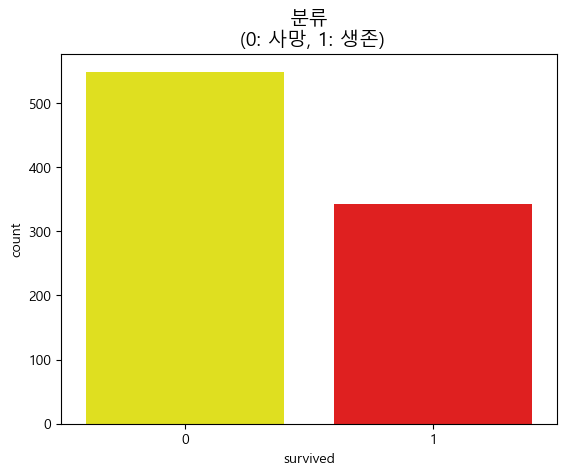

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["yellow", "red"]
sns.countplot('survived', data=df, palette=colors)
plt.title('분류\n (0: 사망, 1: 생존)', fontsize=14)
# 불균형 데이터셋

In [16]:
from sklearn.model_selection import train_test_split

train_cols = ['sex', 'age', 'sibsp', 'parch', 'fare',
'adult_male', 'alone', 'pclass_1', 'pclass_2', 'pclass_3',
'deck_A', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F',
'deck_G', 'embarked_C', 'embarked_Q', 'embarked_S']
X = df[train_cols] # 독립변수
y = df["survived"]
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [17]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['survived'])
df2 = pd.concat([X_samp,y_samp],axis=1)
df2.head()

,sex,age,sibsp,parch,fare,adult_male,alone,pclass_1,pclass_2,pclass_3,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embarked_C,embarked_Q,embarked_S,survived
0,1,25.000000,0,0,13.000,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,1,33.000000,0,0,7.775,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,1,42.000000,0,0,13.000,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,0,29.699118,0,0,7.750,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0
4,1,45.500000,0,0,7.225,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0


c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


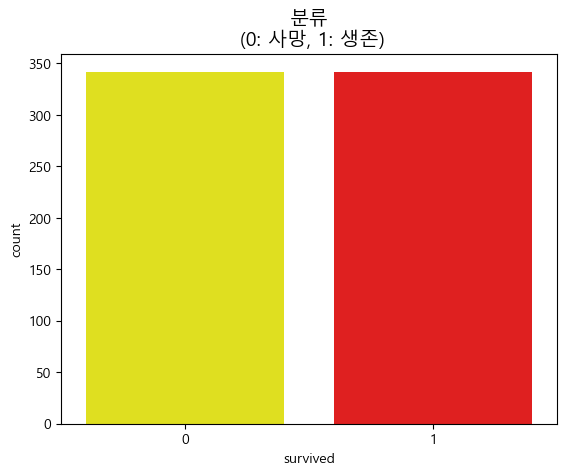

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["yellow", "red"]
sns.countplot('survived', data=df2, palette=colors)
plt.title('분류\n (0: 사망, 1: 생존)', fontsize=14)
X = X_samp[train_cols] # 독립변수
y = y_samp["survived"]

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
# 트리 모델 생성
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
print("학습용:", model.score(X_train, y_train))
print("검증용:", model.score(X_test, y_test))
# 과적합 발생

학습용: 0.9853747714808044
검증용: 0.7956204379562044


In [20]:
# max_depth 가지치기
model = DecisionTreeClassifier(max_depth=3, random_state=10)
model.fit(X_train, y_train)
print("학습용:", model.score(X_train, y_train))
print("검증용:", model.score(X_test, y_test))

학습용: 0.8190127970749543
검증용: 0.7956204379562044


In [21]:
# confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[54, 18],
       [10, 55]], dtype=int64)

In [22]:
df_cm=pd.DataFrame(cm, index=[0, 1], columns=[0, 1])
df_cm

,0,1
0,54,18
1,10,55


c:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


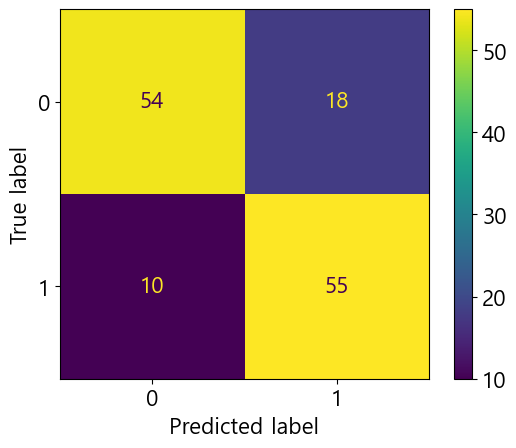

In [23]:
from sklearn.metrics import plot_confusion_matrix

plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(model, X_test, y_test)

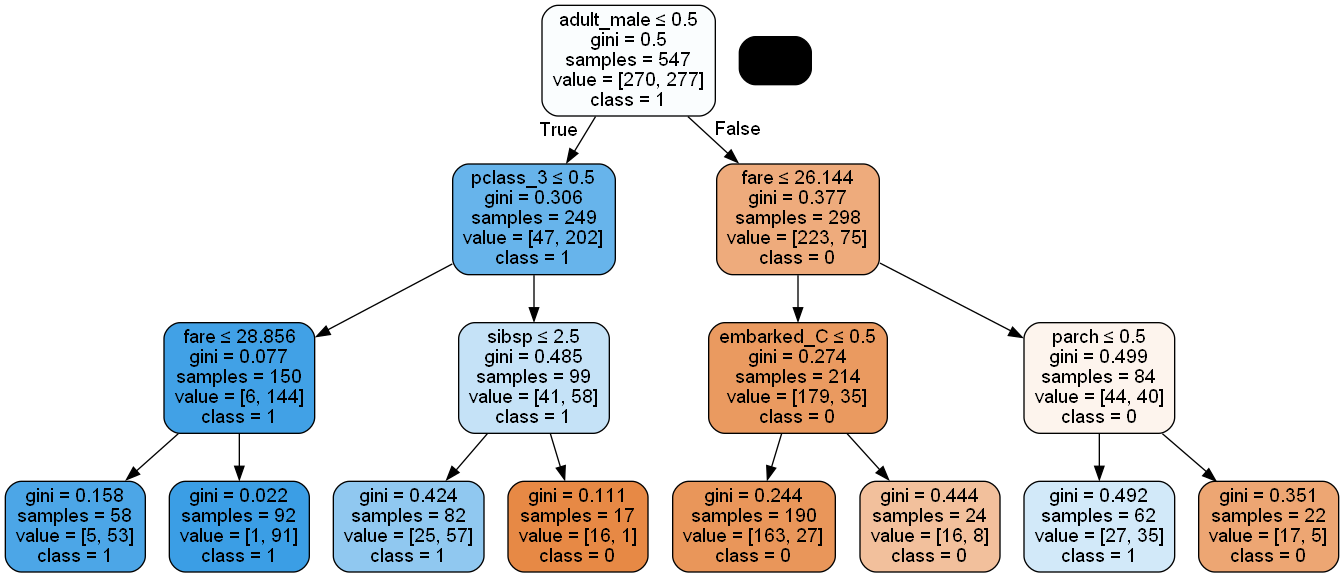

In [24]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image

dot_data = export_graphviz(model, out_file=None, feature_names=train_cols, class_names=["0","1"], filled=True,
                            rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [25]:
# 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 특성 중요도 적용
#0~1 사이의 값(0 전혀 사용되지 않음 ~ 1 완벽하게 타겟 클래스 예측)
import numpy as np
from matplotlib import font_manager, rc

# 한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.figure(figsize=(10,6))
def plot_tree(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train_cols)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

<Figure size 1000x600 with 0 Axes>

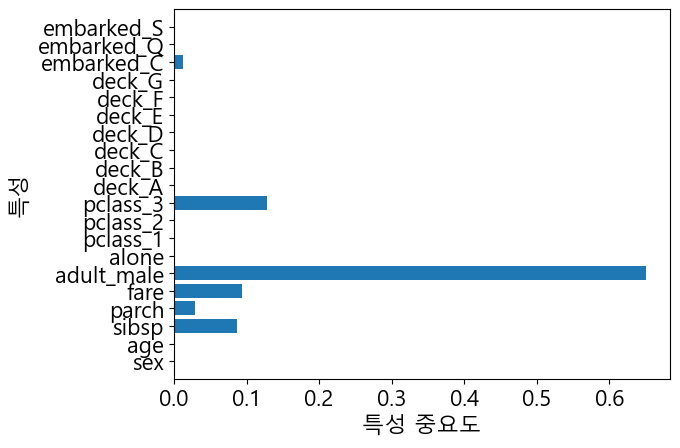

In [26]:
plot_tree(model)
# 성인남성 > 3등석 > 요금 순으로 중요한 변수임

In [27]:
from sklearn.ensemble import RandomForestClassifier

# 100개의 트리로 구성된 랜덤 포레스트
forest = RandomForestClassifier(n_estimators=100, random_state=10, max_depth=5)
forest.fit(X_train, y_train)
print("학습용:", forest.score(X_train, y_train))
print("검증용:", forest.score(X_test, y_test))

학습용: 0.8391224862888482
검증용: 0.8175182481751825


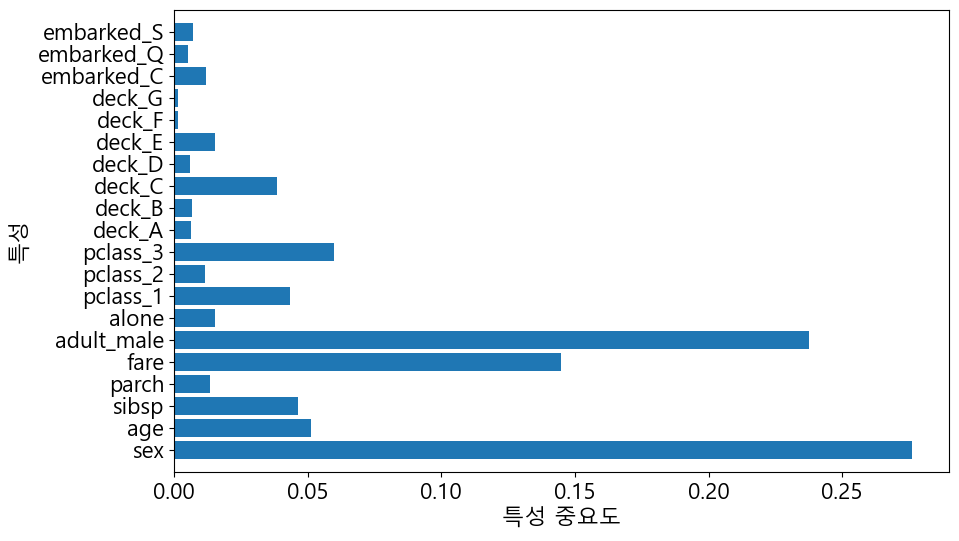

In [28]:
# 랜덤 포레스트에서 제공하는 각 트리의 특성 중요도
# 랜덤 포레스트는 좀 더 폭넓은 시각으로 데이터를 관찰할 수 있다
plt.figure(figsize=(10,6))
plot_tree(forest)
# 성별 > 성인남성 > 요금 > 3등석 > 나이 순으로 중요한 변수임